In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'https://api.covidtracking.com/v1/states/gu/daily.csv'
df = pd.read_csv(url, parse_dates=['date'])
df.head()

,date,state,positive,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2020-09-30,GU,2488,47626,NaN,50114,25.0,NaN,9.0,NaN,...,50114,2,0,eee62bbc0708ed98ffe547e44b5040f60c6170ac,0,0,0,0,0,NaN
1,2020-09-29,GU,2443,47284,NaN,49727,26.0,NaN,9.0,NaN,...,49727,1,0,1b5d949f3ad110eefb12135513058dd99c1a43ec,0,0,0,0,0,NaN
2,2020-09-28,GU,2390,46821,NaN,49211,28.0,NaN,10.0,NaN,...,49211,3,0,4634ba79fc45c7231de6e149dcf9ae6461ab0607,0,0,0,0,0,NaN
3,2020-09-27,GU,2354,46365,NaN,48719,30.0,NaN,9.0,NaN,...,48719,0,0,064f82e04310f7874c239c81d1d4ad411dc17a2e,0,0,0,0,0,NaN
4,2020-09-26,GU,2354,46365,NaN,48719,30.0,NaN,9.0,NaN,...,48719,2,0,7185eba890dd8a1d9ad81f1a7efd70101c32b967,0,0,0,0,0,NaN


---

- Column descriptions can be found at "https://covidtracking.com/data/api" under "Historic values for a single state"

---

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 54 columns):
date                           199 non-null datetime64[ns]
state                          199 non-null object
positive                       199 non-null int64
negative                       199 non-null int64
pending                        0 non-null float64
totalTestResults               199 non-null int64
hospitalizedCurrently          143 non-null float64
hospitalizedCumulative         0 non-null float64
inIcuCurrently                 94 non-null float64
inIcuCumulative                0 non-null float64
onVentilatorCurrently          18 non-null float64
onVentilatorCumulative         0 non-null float64
recovered                      187 non-null float64
dataQualityGrade               159 non-null object
lastUpdateEt                   199 non-null object
dateModified                   199 non-null object
checkTimeEt                    199 non-null object
death                    

In [4]:
#remove columns with no data recorded, columns not necessary for analysis, 
#columns displaying the same data as others, & depreciated data
columns = ['deathConfirmed', 'deathProbable', 'hospitalized', 
         'hospitalizedCumulative', 'inIcuCumulative', 'negativeTestsAntibody', 'pending',
         'negativeTestsPeopleAntibody', 'onVentilatorCumulative',
         'positiveTestsAntigen', 'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',
         'totalTestEncountersViral', 'totalTestsAntigen', 'totalTestsPeopleAntibody', 
         'totalTestsPeopleAntigen', 'hospitalizedIncrease', 'hash', 'commercialScore',
         'negativeRegularScore', 'negativeScore', 'positiveScore', 'score',
          'grade', 'totalTestResultsSource', 'state', 'lastUpdateEt', 'dateModified',
          'checkTimeEt', 'dateChecked', 'fips', 'total', 'posNeg', 'dataQualityGrade']
df_1 = df.drop(columns, axis=1)

In [5]:
df_1.head()

,date,positive,negative,totalTestResults,hospitalizedCurrently,inIcuCurrently,onVentilatorCurrently,recovered,death,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,positiveIncrease,negativeIncrease,totalTestResultsIncrease,deathIncrease
0,2020-09-30,2488,47626,50114,25.0,9.0,NaN,1822.0,49.0,50110.0,NaN,NaN,2486.0,50112.0,180.0,3.0,45,342,387,2
1,2020-09-29,2443,47284,49727,26.0,9.0,NaN,1811.0,47.0,49725.0,NaN,NaN,2443.0,49727.0,180.0,3.0,53,463,516,1
2,2020-09-28,2390,46821,49211,28.0,10.0,NaN,1795.0,46.0,49209.0,NaN,NaN,2390.0,49211.0,180.0,3.0,36,456,492,3
3,2020-09-27,2354,46365,48719,30.0,9.0,NaN,1668.0,43.0,48254.0,NaN,NaN,2354.0,48719.0,179.0,3.0,0,0,0,0
4,2020-09-26,2354,46365,48719,30.0,9.0,NaN,1668.0,43.0,48254.0,NaN,NaN,2354.0,48719.0,179.0,3.0,68,395,463,2


In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 20 columns):
date                        199 non-null datetime64[ns]
positive                    199 non-null int64
negative                    199 non-null int64
totalTestResults            199 non-null int64
hospitalizedCurrently       143 non-null float64
inIcuCurrently              94 non-null float64
onVentilatorCurrently       18 non-null float64
recovered                   187 non-null float64
death                       193 non-null float64
totalTestsViral             133 non-null float64
positiveTestsViral          33 non-null float64
negativeTestsViral          33 non-null float64
positiveCasesViral          165 non-null float64
totalTestsPeopleViral       129 non-null float64
totalTestsAntibody          127 non-null float64
positiveTestsAntibody       127 non-null float64
positiveIncrease            199 non-null int64
negativeIncrease            199 non-null int64
totalTestResultsIncr

In [7]:
#create column with daily positive result rate
df_1['positive_rate'] = round((df_1['positiveIncrease']/df_1['totalTestResultsIncrease']) * 100, 2)

In [8]:
df_1['positive_rate'].head()

0    11.63
1    10.27
2     7.32
3      NaN
4    14.69
Name: positive_rate, dtype: float64

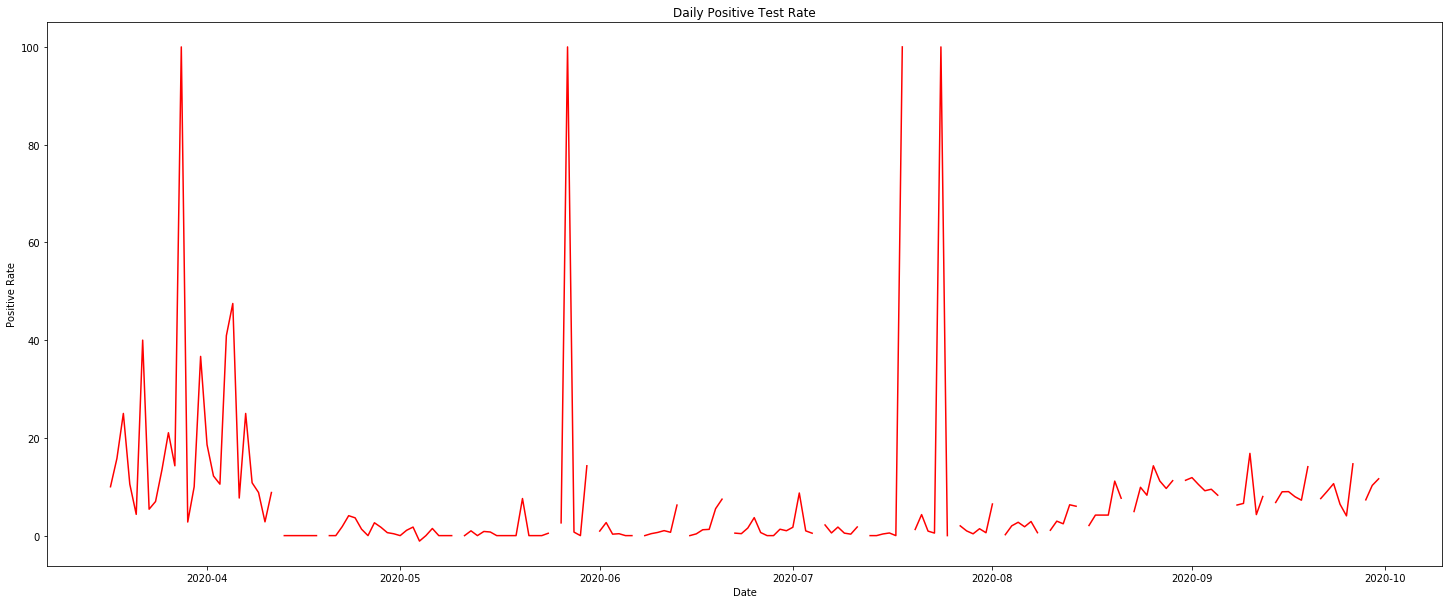

In [9]:
#plot daily positive rate by date

# Create figure and plot space
fig, ax = plt.subplots(figsize=(25, 10))

# Add x-axis and y-axis
ax.plot(df_1['date'],
        df_1['positive_rate'],
        color='red')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Positive Rate",
       title="Daily Positive Test Rate")

plt.show()

In [12]:
df_1['positive_rate'].value_counts()[:10]

0.00      34
100.00     4
14.29      3
8.27       2
25.00      2
0.30       2
0.40       2
8.82       2
4.20       2
10.00      2
Name: positive_rate, dtype: int64

In [13]:
#need to investigate data more, looks like there are 4 instances where the positive rate is 100%. 